<center>Заметка 6.с Многомасштабный поиск метки</center>
<center>курса <q>Введение в цифровую обработку изображений</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.095</center>

<center>Аннотация</center>
<p>
...
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

<h2>Скорее относится ко второй части</h2>

Найдем метки на другом изображении используя ранее наденный шаблон метки. Предыдущий случай был простой, т.к. все метки были примерно одного размера

<h3>Поиск метки</h3>

Загружаем изображение на котором будем искать метку.
Метка взята с другого изображения.
Как будет показано далее на этих изображениях метки разных масштабов.

In [3]:
f_seg = './data/дырки_метки/'

In [4]:
im1 = cv.imread( f_seg + 'DSC_0825.JPG' )[:,:,::-1]
im1.shape

(3264, 4928, 3)

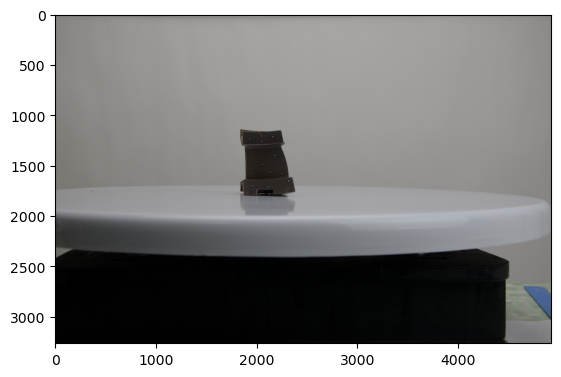

In [5]:
plt.imshow( im1 );

Откадрируем интересующий нас объект.

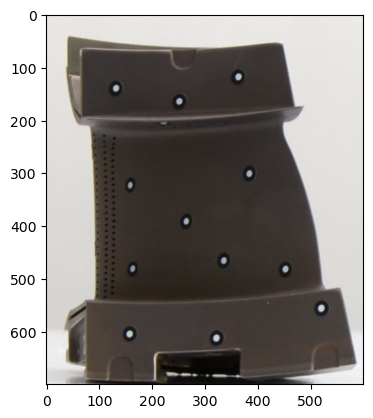

In [7]:
obj1 = im1[1100:1800,1800:2400]
plt.imshow( np.uint8(obj1*1.5) );

Откадрируем и непосредственно саму метку, которую будем искать.

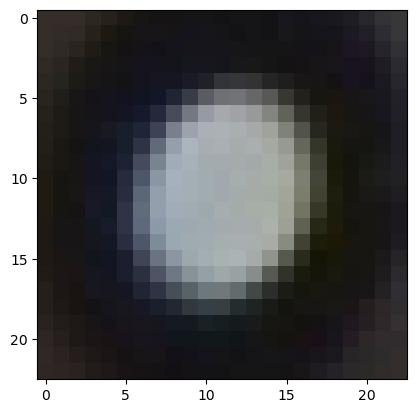

In [8]:
met1 = obj1[ 455:478, 325:348 ]
plt.imshow( np.uint8(met1*1.5) );

In [9]:
im1gr = cv.cvtColor( obj1, cv.COLOR_RGB2GRAY )
im1gr.shape

(700, 600)

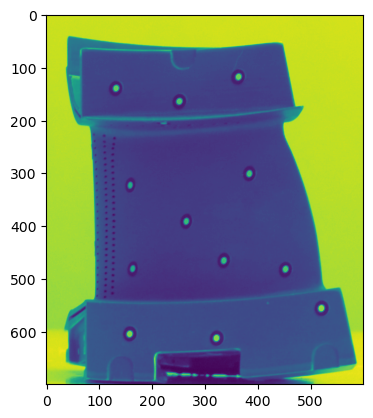

In [10]:
plt.imshow( im1gr );

In [11]:
met1gr = im1gr[ 455:478, 325:348 ]
met1gr.shape

(23, 23)

In [12]:
tst1 = cv.imread( f_seg + 'DSC_0079.JPG' )[:,:,::-1]
tst1.shape

(3264, 4928, 3)

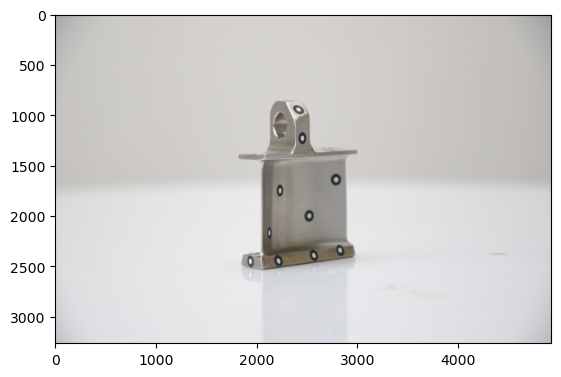

In [13]:
plt.imshow( tst1 );

Откадрируем изображение как если бы первоначально съемка была такая.

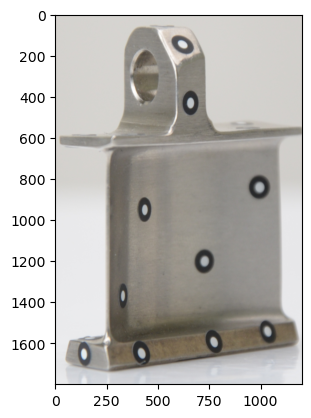

In [14]:
obj2 = tst1[800:2600,1800:3000]
plt.imshow( np.uint8(obj2) );

Посмотрим как выглядит метка на данном изображении.

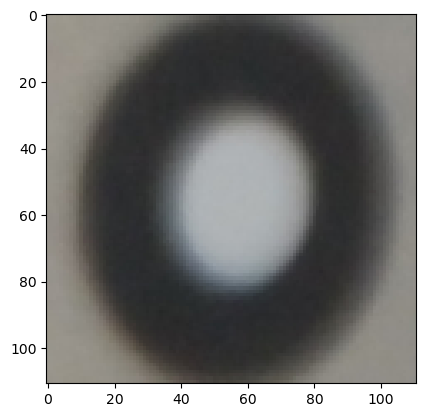

In [16]:
met2 = obj2[ 1147:1258, 669:780 ]
plt.imshow( np.uint8(met2) );

In [17]:
met2.shape, met1.shape

((111, 111, 3), (23, 23, 3))

Размер меток отличается где-то в 5 раз.

Но мы же заранее про это не знаем, поэтому перебираем разные размеры.

Идея состоит в том, чтобы построить пирамиду изображений разного масштаба и на каждом изображении поискать метку. Предполагаем, что хотя бы на одном изображении из пирамиды размер меток совпадёт.

In [18]:
im2gr = cv.cvtColor( obj2, cv.COLOR_RGB2GRAY )
im2gr.shape

(1800, 1200)

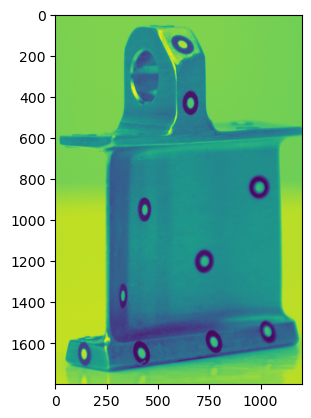

In [19]:
plt.imshow( im2gr );

In [20]:
im2gr.shape

(1800, 1200)

0 уровень Гауссовой пирамиды - исходное изображение.

(1800, 1200)


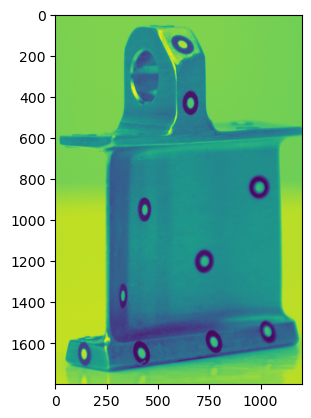

In [21]:
im2gr_0 = im2gr.copy()
print( im2gr_0.shape )
plt.imshow( im2gr_0 );

Сразу перейдем к 1 уровню.

(900, 600)


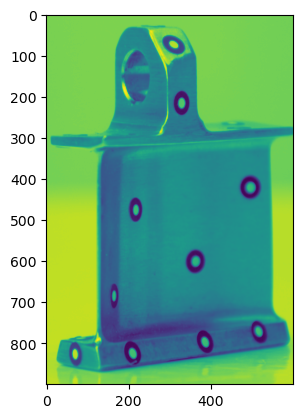

In [22]:
im2gr_1 = cv.pyrDown( im2gr_0 ) # в два раза уменьшаем изображение
print( im2gr_1.shape )
plt.imshow( im2gr_1 );

Запустим непосредственный поиск метки перебирая масштаб изображения.

In [23]:
ff = 1. # Исходный масштаб.
f99 = 0.999 # Шаг масштаба.

In [24]:
ff = ff * f99
print( ff )
# fx и fy указывают требуемый масштаб.
im2gr__ = cv.resize( im2gr_1, None, fx = ff, fy=ff )

0.999


In [25]:
im2gr__.shape

(899, 599)

Далее, для каждого отмаштабированного изображения запускается поиск по образцу.

In [26]:
cc = cv.matchTemplate(im2gr__, met1gr, cv.TM_CCORR_NORMED)
cc.shape

(877, 577)

0.8652962

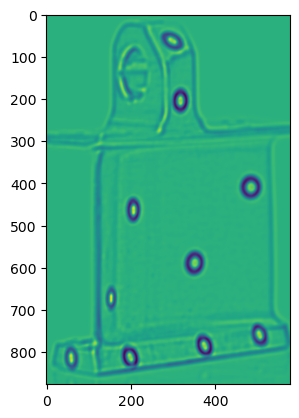

In [27]:
plt.imshow( cc )
np.max( cc )

0.86 пока качество далеко от хорошего.

Запустим перебор по всем масштабам.

In [28]:
ff = 1.
f99 = 0.99
mm = []
for i in range(80):
    ff = ff * f99
    im2gr__ = cv.resize( im2gr_1, None, fx = ff, fy=ff, interpolation = cv.INTER_CUBIC  )
    cc = cv.matchTemplate(im2gr__, met1gr, cv.TM_CCORR_NORMED)
    # Наилучшее значение при поиске по образцу это значение наиболее близкое к 1.
    mm.append( np.max( cc ) ) # В список будем сохранять максимальные значения.
    print( ff, mm[-1] )

0.99 0.8653409
0.9801 0.8627106
0.9702989999999999 0.86505544
0.96059601 0.8641328
0.9509900498999999 0.86353475
0.9414801494009999 0.8640005
0.9320653479069899 0.8638305
0.92274469442792 0.86565715
0.9135172474836407 0.8672414
0.9043820750088043 0.86938727
0.8953382542587163 0.87147844
0.8863848717161291 0.8737476
0.8775210229989678 0.8757107
0.8687458127689781 0.8774232
0.8600583546412883 0.87912536
0.8514577710948754 0.88123995
0.8429431933839266 0.8854546
0.8345137614500874 0.88981026
0.8261686238355865 0.8936927
0.8179069375972307 0.8964116
0.8097278682212583 0.89790463
0.8016305895390458 0.9001593
0.7936142836436553 0.90497154
0.7856781408072188 0.9082405
0.7778213593991465 0.908809
0.7700431458051551 0.91111016
0.7623427143471035 0.91495043
0.7547192872036325 0.91561085
0.7471720943315961 0.9152856
0.7397003733882802 0.91991246
0.7323033696543974 0.9179883
0.7249803359578534 0.91966254
0.7177305325982748 0.92090034
0.7105532272722921 0.91707844
0.7034476949995692 0.9205685
0.696

Отобразим динамику изменения точности поиска по образцу.

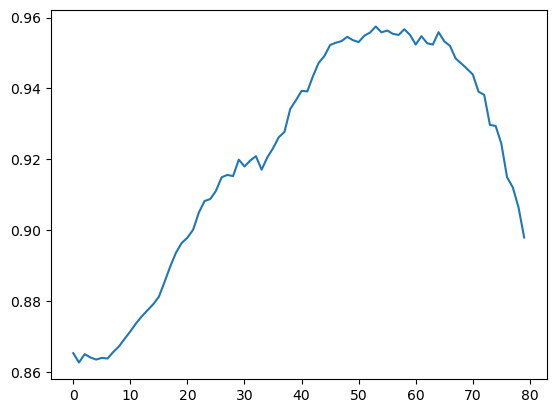

In [29]:
plt.plot( mm );

Приблизем кусок где находится максимум.

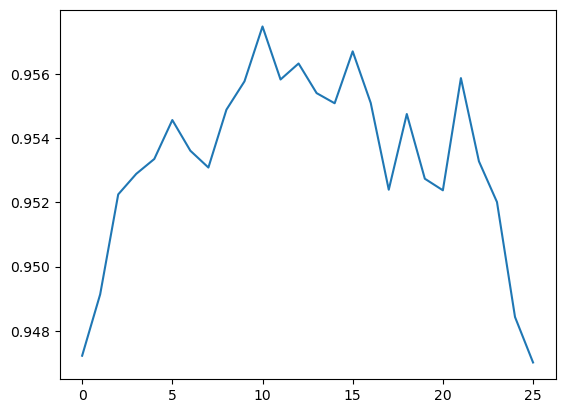

In [30]:
plt.plot( mm[43:69] );

In [31]:
(69-43)/2 # Вычисляем центр интервала

13.0

In [32]:
43+13 # Помним, что это ыбло вырезано из исходного сигнала с отметки 43.

56

In [33]:
mm[43+13] # Проверяем значение корелляции.

0.9554022

In [34]:
fff = f99**(43+13) # Интегральное значение коеффицинта маштабирования.
fff

0.5696012024771592

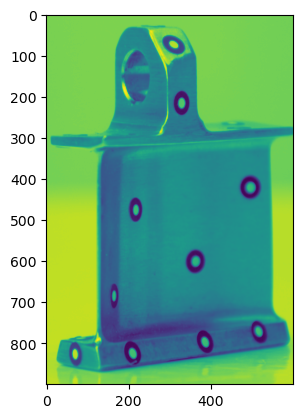

In [35]:
plt.imshow( im2gr_1 );

In [36]:
im2gr__ = cv.resize( im2gr_1, None, fx = fff, fy=fff, interpolation = cv.INTER_CUBIC  )
cc = cv.matchTemplate(im2gr__, met1gr, cv.TM_CCORR_NORMED)

0.95632434

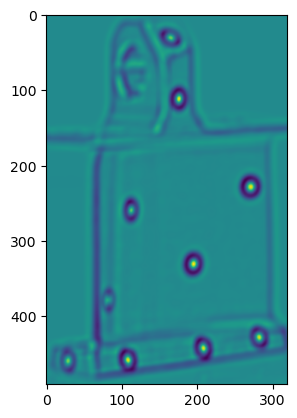

In [37]:
plt.imshow( cc )
np.max( cc )

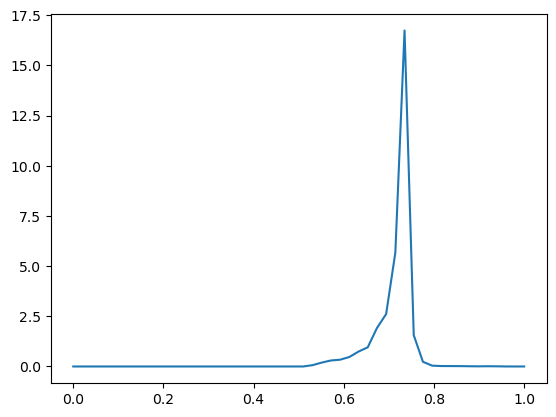

In [38]:
sm = stats.gaussian_kde( cc.flatten() )
val = np.linspace(0.0, 1, 50)
plt.plot( val, sm( val ) );

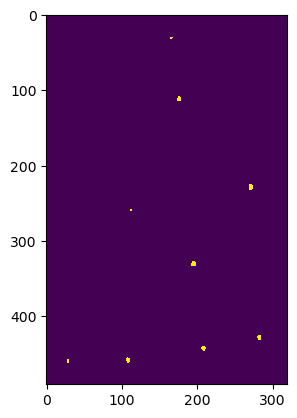

In [39]:
mrkrs2 = (cc>0.83).astype("uint8")
plt.imshow( mrkrs2, interpolation = 'none' );

In [40]:
np.unique( mrkrs2 )

array([0, 1], dtype=uint8)

In [41]:
retv, lab, pla, cent = cv.connectedComponentsWithStats( mrkrs2 )
cent = cent[1:] # Убираем центр фона.
cent.shape

(9, 2)

На том изображении (нужного нам маштаба) на котором нашли.

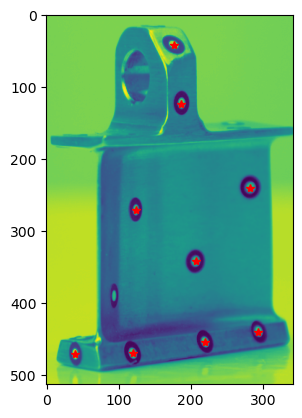

In [42]:
plt.imshow( np.uint8(im2gr__) )
plt.plot( cent[:,0]+23//2, cent[:,1]+23//2, "r*" );

Исходный фрагмент изображения.

(1800, 1200, 3)


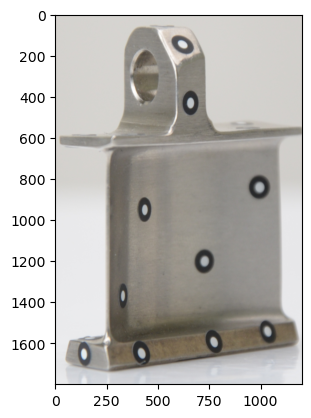

In [43]:
plt.imshow( obj2 )
print( obj2.shape )

Общее уменьшение изображения.

In [44]:
k = 1.
k /= 2
k *= fff
print( k )

0.2848006012385796


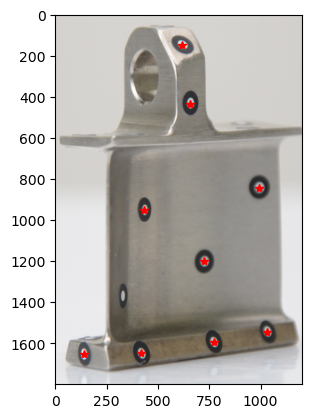

In [45]:
plt.imshow( obj2 )
plt.plot( (cent[:,0]+23//2)/k, (cent[:,1]+23//2)/k, "r*" );

Успешно нашли метки, хоть использовали шаблон с другого изображения.